# <center><u> Prediction Using K-Nearest Neighbors

<ol>
    <li><strong>Apply Knn(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Apply Knn(kd tree version) on these feature sets</strong>
        <br><font color='red'>NOTE: </font>sklearn implementation of kd-tree accepts only dense matrices, you need to convert the sparse matrices of CountVectorizer/TfidfVectorizer into dense matices. You can convert sparse matrices to dense using .toarray() attribute. For more information please visit this <a href='https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.toarray.html'>link</a>
        <ul>
            <li><font color='red'>SET 5:</font>Review text, preprocessed one converted into vectors using (BOW) but with restriction on maximum features generated.
            <pre>
            count_vect = CountVectorizer(min_df=10, max_features=500) 
            count_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 6:</font>Review text, preprocessed one converted into vectors using (TFIDF) but with restriction on maximum features generated.
            <pre>
                tf_idf_vect = TfidfVectorizer(min_df=10, max_features=500)
                tf_idf_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best K)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

###  Importing Required Packages 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem import SnowballStemmer

import re
from sklearn.manifold import TSNE
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

### Loading the Final Dataset

In [2]:
# os.getcwd()
conn = sqlite3.connect('finals_36k.sqlite')
final = pd.read_sql_query("""
SELECT *
FROM Reviews""",conn)
# preprocessed_reviews = final.CleanedText.values
final = final.drop(["level_0" , "index"] , axis = 1)
# print (type(preprocessed_reviews))
# print (len(preprocessed_reviews))

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X = final
# X.shape = (X.shape[0] , 1)
Y = final.Score

In [5]:
print('Before UnderSampling, the shape of X: {}'.format(X.shape))
print('Before UnderSampling, the shape of Y: {} \n'.format(Y.shape))

print("Before UnderSampling, counts of label '1': {}".format(sum(Y == 1)))
print("Before UnderSampling, counts of label '0': {}".format(sum(Y == 0)))

Before UnderSampling, the shape of X: (363223, 12)
Before UnderSampling, the shape of Y: (363223,) 

Before UnderSampling, counts of label '1': 306226
Before UnderSampling, counts of label '0': 56997


### Undersampling the Data

In [6]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_new, Y_new = rus.fit_resample(X, Y)

print('After UnderSampling, the shape of X: {}'.format(X_new.shape))
print('After UnderSampling, the shape of Y: {} \n'.format(Y_new.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(Y_new == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(Y_new == 0)))

After UnderSampling, the shape of X: (113994, 12)
After UnderSampling, the shape of Y: (113994,) 

After UnderSampling, counts of label '1': 56997
After UnderSampling, counts of label '0': 56997


In [7]:
X_new = X_new.sort_values(by="Time")
X_new = X_new.drop(["Id" , "ProductId" , "UserId" , "ProfileName" , "HelpfulnessNumerator" , "HelpfulnessDenominator" , "Time" , "Summary" ] , axis = 1).reset_index(drop = True)
# pd.X_new.sort_values(by="Time")
X_new

,Score,Text,CleanedText,Unstemmed_CleanedText
0,0,"I, myself always enjoyed this movie, it's very...",i alway enjoy movi funni entertain i not hesit...,i always enjoyed movie funny entertaining i no...
1,1,This are so much easier to use than the Wilson...,this much easier use wilson past color color v...,this much easier use wilson paste colors color...
2,1,"These are easy to use, they do not make a mess...",these easi use not make mess offer vibrant col...,these easy use not make mess offer vibrant col...
3,1,"This is such a great film, I don't even know h...",this great film i not even know sum first comp...,this great film i not even know sum first comp...
4,0,Michael Keaton brings no distinguishing charac...,michael keaton bring no distinguish characteri...,michael keaton brings no distinguishing charac...
...,...,...,...,...
113989,0,"For quite some time, I have been using differe...",for quit time i use differ type hot sauc diffe...,for quite time i using different types hot sau...
113990,1,Super give me full recovery after training in ...,super give full recoveri train gym nice flavor...,super give full recovery training gym nice fla...
113991,0,I bought these to use as decorative center pie...,i bought use decor center piec birthday parti ...,i bought use decorative center pieces birthday...
113992,1,I was introduced to Lagavulin 16 three days ag...,i introduc lagavulin three day ago i no singl ...,i introduced lagavulin three days ago i no sin...


In [8]:
Y_new = X_new.Score

In [9]:
sample_indices = np.sort(np.random.permutation(X_new.shape[0])[:60000])
# sample_indices = list(range(0,60000))
print(sample_indices)
X_new = X_new.take(sample_indices)
Y_new = Y_new.take(sample_indices)

print(X_new.shape , Y_new.shape)

[     0      1      2 ... 113986 113990 113992]
(60000, 4) (60000,)


In [10]:
from sklearn.model_selection import train_test_split

X_Train , X_Test , Y_Train , Y_Test = train_test_split(X_new , Y_new , test_size = 0.2 , shuffle = False)
x_train , x_cv , y_train , y_cv = train_test_split(X_Train , Y_Train , test_size = 0.2 , shuffle = False)

In [11]:
print("X shape :: " , X_Train.shape , "\nY shape :: " , Y_Train.shape)
print("=="*50)
print("X_Test shape :: " , X_Test.shape , "\nY_test shape :: " , Y_Test.shape)
print("=="*50)
print("x_train shape :: " , x_train.shape , "\ny_train shape :: " , y_train.shape)
print("=="*50)
print("x_cv shape :: " , x_cv.shape , "\ny_cv shape :: " , y_cv.shape)

X shape ::  (48000, 4) 
Y shape ::  (48000,)
X_Test shape ::  (12000, 4) 
Y_test shape ::  (12000,)
x_train shape ::  (38400, 4) 
y_train shape ::  (38400,)
x_cv shape ::  (9600, 4) 
y_cv shape ::  (9600,)


In [12]:
y_cv.value_counts()

0    5182
1    4418
Name: Score, dtype: int64

In [13]:
y_train.value_counts()

1    19855
0    18545
Name: Score, dtype: int64

In [14]:
Y_Test.value_counts()

0    6222
1    5778
Name: Score, dtype: int64

## Applying KNN (Brute Force)

#### <font color = 'darkblue'><i> Function to find the best 'K' and Visualize various Plots

In [18]:
from sklearn.metrics import accuracy_score , roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [16]:
def KNN_find_k (train_data , train_target , cv_data = None , cv_target = None , upper_bound = 30 , algo = "brute" , metr = "cosine" 
                , plot_stuff = True):

    neigh = list(range(3,upper_bound,2))

    auc_train = []
    auc_cv = []
    f1 = []
    i = 0

    for k in tqdm(neigh):
        
        print("fitting...")
        KNN = KNeighborsClassifier(n_neighbors = k , algorithm = algo , metric = metr , n_jobs = -1)
        model = KNN.fit(train_data , train_target)
        print("fitted...")
        
        print("predicting...")
        train_pred = model.predict_proba(train_data)[: , 1]
        cv_pred = model.predict_proba(cv_data)[: , 1]
        print ("predicted...")
        
        auc_train.append(roc_auc_score(train_target, train_pred))
        auc_cv.append(roc_auc_score(cv_target,cv_pred))
        f1.append(f1_score(cv_target, model.predict(cv_data)))
        print("k =", k
              ,"-------> auc_train = " , auc_train[i]
              ,"-------> auc_cv = ",auc_cv[i]
              ,"------> f1_score = ", f1[i])
        i += 1

    print ("=="*50)

    idx_best_k, = np.where(f1 == max(f1))
    best_k = neigh[int(idx_best_k)]

    print ("BEST K ------> " , best_k)

    if (plot_stuff == True):
        auc_train = np.array(auc_train)
        auc_cv = np.array(auc_cv)
        plt.scatter(neigh, auc_train)
        plt.plot(neigh, auc_train, label="Train")
        plt.scatter(neigh, auc_cv)
        plt.plot(neigh, auc_cv, label='Cv')
        plt.scatter(neigh, auc_train-auc_cv)
        plt.plot(neigh, auc_train-auc_cv, label='Difference')
        plt.grid()
        plt.xlabel('K-hyperparameter')
        plt.ylabel('AUC')
        plt.legend()
        plt.title('AUC score V/S K')
        plt.show()
        
        plt.scatter(neigh, f1)
        plt.plot(neigh, f1)
        plt.title("K-hyperparameter V/S F1 Scores")
        plt.xlabel('K-hyperparameter')
        plt.ylabel('F1-Scores')
        plt.show()


    
    return best_k;

### [1] Applying KNN brute force on <font color='red'>BOW</font>

#### <u><font color = 'DarkOrange'> UNI-GRAM

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

cv = CountVectorizer(min_df = 10 , max_features = 5000)

bow_train = cv.fit(x_train.CleanedText)
bow_train = cv.transform(x_train.CleanedText)
bow_cv = cv.transform(x_cv.CleanedText)

bow_train = Normalizer().fit_transform(bow_train)
bow_cv = Normalizer().fit_transform(bow_cv)

In [18]:
bow_train.shape

(38400, 5000)

k = 3 -------> auc_train =  0.9377748904789149 -------> auc_cv =  0.735689246809916 ------> f1_score =  0.6847770374167094
k = 5 -------> auc_train =  0.9161325616742272 -------> auc_cv =  0.7767645216795744 ------> f1_score =  0.7028209053137984
k = 7 -------> auc_train =  0.904072733683721 -------> auc_cv =  0.7963588464160061 ------> f1_score =  0.7054545454545454
k = 9 -------> auc_train =  0.8961497132898069 -------> auc_cv =  0.8105987918832432 ------> f1_score =  0.7153774895785086
k = 11 -------> auc_train =  0.8911983208778622 -------> auc_cv =  0.8175100233188043 ------> f1_score =  0.7147379528666901
k = 13 -------> auc_train =  0.8873055368654109 -------> auc_cv =  0.8215301451670851 ------> f1_score =  0.7183081858144232
k = 15 -------> auc_train =  0.8845726905478823 -------> auc_cv =  0.825904906528343 ------> f1_score =  0.7198662047545096
k = 17 -------> auc_train =  0.8821154673558174 -------> auc_cv =  0.8292596040335121 ------> f1_score =  0.7211145808311313
k = 19 

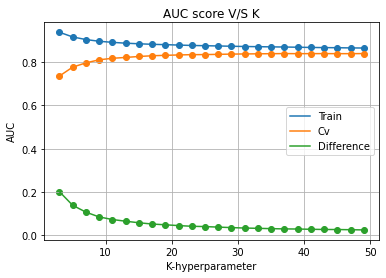

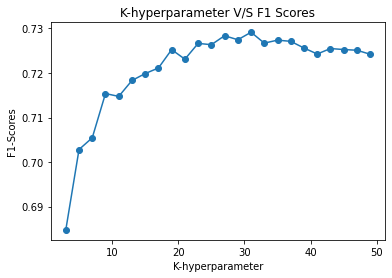

Using the best_k = 31
TEST roc_auc_score =  0.8489376913515153
TEST f1_score =  0.7281684698608965
TEST accuracy_score =  0.7655



AxesSubplot(0.125,0.125;0.62x0.755)


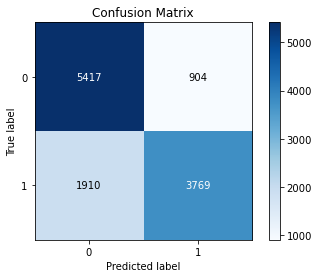

In [19]:
k = KNN_find_k (train_data = bow_train , train_target = y_train , cv_data = bow_cv , cv_target = y_cv , upper_bound = 50 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

cv = CountVectorizer(min_df = 10 , max_features = 5000)

bow_train = cv.fit(X_Train.CleanedText)
bow_train = cv.transform(X_Train.CleanedText)
bow_test = cv.transform(X_Test.CleanedText)

bow_train = Normalizer().fit_transform(bow_train)
bow_cv = Normalizer().fit_transform(bow_cv)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(bow_train , Y_Train)
y_pred_proba = KNN.predict_proba(bow_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

#### <u><font color = 'DarkOrange'> UNI+BI-GRAM

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

cv = CountVectorizer(ngram_range = (1,2) , max_features = 5000)

bow_train = cv.fit(x_train.CleanedText)
bow_train = cv.transform(x_train.CleanedText)
bow_cv = cv.transform(x_cv.CleanedText)

bow_train = Normalizer().fit_transform(bow_train)
bow_cv = Normalizer().fit_transform(bow_cv)

In [21]:
bow_train.shape

(38400, 5000)

k = 3 -------> auc_train =  0.9553502677360733 -------> auc_cv =  0.6881779967836403 ------> f1_score =  0.6367685919214798
k = 5 -------> auc_train =  0.9251895396683008 -------> auc_cv =  0.7686490673111915 ------> f1_score =  0.6989188198643943
k = 7 -------> auc_train =  0.913467710931671 -------> auc_cv =  0.7983489356509991 ------> f1_score =  0.7207027350768617
k = 9 -------> auc_train =  0.9056692268709473 -------> auc_cv =  0.815209892183033 ------> f1_score =  0.7314178638351032
k = 11 -------> auc_train =  0.9004556257591345 -------> auc_cv =  0.8252399629042262 ------> f1_score =  0.7348906986712388
k = 13 -------> auc_train =  0.8965636592688749 -------> auc_cv =  0.8312874297095963 ------> f1_score =  0.738760366652117
k = 15 -------> auc_train =  0.8935601533534744 -------> auc_cv =  0.8351023719505536 ------> f1_score =  0.738980792716776
k = 17 -------> auc_train =  0.8914488955036182 -------> auc_cv =  0.8395017810857266 ------> f1_score =  0.7418591549295773
k = 19 -

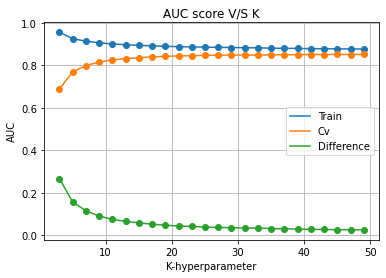

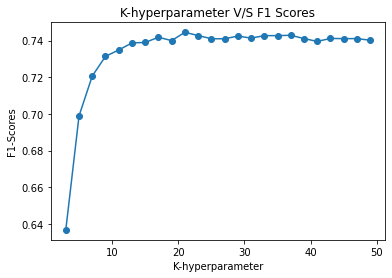

Using the best_k = 21
TEST roc_auc_score =  0.8582996542966216
TEST f1_score =  0.7651066088649031
TEST accuracy_score =  0.77875



AxesSubplot(0.125,0.125;0.62x0.755)


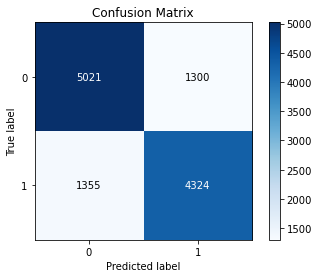

In [22]:
k = KNN_find_k (train_data = bow_train , train_target = y_train , cv_data = bow_cv , cv_target = y_cv , upper_bound = 50 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

cv = CountVectorizer(ngram_range = (1,2) , max_features = 5000)

bow_train = cv.fit(X_Train.CleanedText)
bow_train = cv.transform(X_Train.CleanedText)
bow_test = cv.transform(X_Test.CleanedText)

bow_train = Normalizer().fit_transform(bow_train)
bow_test = Normalizer().fit_transform(bow_test)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(bow_train , Y_Train)
y_pred_proba = KNN.predict_proba(bow_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

In [23]:
del bow_train , bow_cv , bow_test;

### [2] Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

#### <u><font color = 'DarkOrange'> UNI-GRAM

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

cv = TfidfVectorizer(min_df = 10 , max_features = 5000)

tfidf_train = cv.fit(x_train.CleanedText)
tfidf_train = cv.transform(x_train.CleanedText)
tfidf_cv = cv.transform(x_cv.CleanedText)

bow_train = Normalizer().fit_transform(tfidf_train)
bow_cv = Normalizer().fit_transform(tfidf_cv)

In [25]:
bow_train.shape

(38400, 5000)

k = 3 -------> auc_train =  0.9345391675207917 -------> auc_cv =  0.6914394129529559 ------> f1_score =  0.6710235640648012
k = 5 -------> auc_train =  0.902474832239829 -------> auc_cv =  0.7358030461065017 ------> f1_score =  0.6845128005451183
k = 7 -------> auc_train =  0.8875122749191655 -------> auc_cv =  0.7564852379281518 ------> f1_score =  0.6902443870454997
k = 9 -------> auc_train =  0.8792965299762682 -------> auc_cv =  0.7720698418272811 ------> f1_score =  0.6981378963261198
k = 11 -------> auc_train =  0.8743608090030127 -------> auc_cv =  0.7816485611140899 ------> f1_score =  0.7028507659531298
k = 13 -------> auc_train =  0.8712370214006452 -------> auc_cv =  0.7882044319581812 ------> f1_score =  0.7074217951339195
k = 15 -------> auc_train =  0.8692578300510099 -------> auc_cv =  0.7944450385451416 ------> f1_score =  0.7144475337246422
k = 17 -------> auc_train =  0.8681251910788371 -------> auc_cv =  0.8006959587396264 ------> f1_score =  0.7182137688649989
k = 1

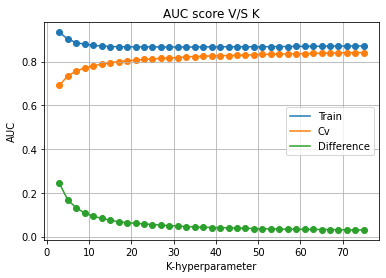

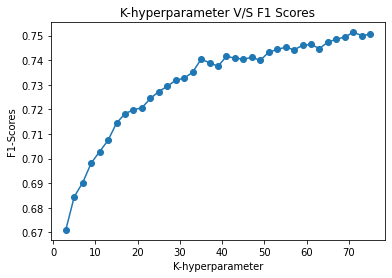

Using the best_k = 71
TEST roc_auc_score =  0.8662395887072217
TEST f1_score =  0.7818599311136624
TEST accuracy_score =  0.7783333333333333



AxesSubplot(0.125,0.125;0.62x0.755)


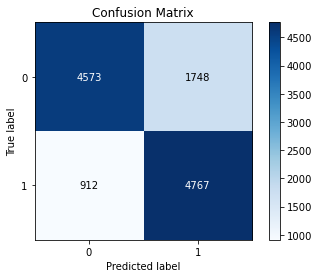

In [26]:
k = KNN_find_k (train_data = bow_train , train_target = y_train , cv_data = bow_cv , cv_target = y_cv , upper_bound = 76 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

cv = TfidfVectorizer(ngram_range = (1,2), max_features = 5000)

bow_train = cv.fit(X_Train.CleanedText)
bow_train = cv.transform(X_Train.CleanedText)
bow_test = cv.transform(X_Test.CleanedText)

bow_train = Normalizer().fit_transform(bow_train)
bow_test = Normalizer().fit_transform(bow_test)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(bow_train , Y_Train)
y_pred_proba = KNN.predict_proba(bow_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

In [27]:
del tfidf_train , tfidf_cv , bow_train , bow_test;

#### <u><font color = 'DarkOrange'> UNI+BI-GRAM

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

cv = TfidfVectorizer(ngram_range = (1,2), max_features = 5000)

tfidf_train = cv.fit(x_train.CleanedText)
tfidf_train = cv.transform(x_train.CleanedText)
tfidf_cv = cv.transform(x_cv.CleanedText)

bow_train = Normalizer().fit_transform(tfidf_train)
bow_cv = Normalizer().fit_transform(tfidf_cv)

In [29]:
bow_train.shape

(38400, 5000)

k = 3 -------> auc_train =  0.9723820905125587 -------> auc_cv =  0.6614572751597505 ------> f1_score =  0.6277903002981168
k = 5 -------> auc_train =  0.918916637571749 -------> auc_cv =  0.7400886996468158 ------> f1_score =  0.6810192582625515
k = 7 -------> auc_train =  0.9008835212198505 -------> auc_cv =  0.7672574076721266 ------> f1_score =  0.7003932785126923
k = 9 -------> auc_train =  0.8918355889322857 -------> auc_cv =  0.7859833353953265 ------> f1_score =  0.7128749423165667
k = 11 -------> auc_train =  0.8859686463563157 -------> auc_cv =  0.7985123145566387 ------> f1_score =  0.7175917215428034
k = 13 -------> auc_train =  0.8827307532977567 -------> auc_cv =  0.8043042573654126 ------> f1_score =  0.7237093690248566
k = 15 -------> auc_train =  0.8810035271764096 -------> auc_cv =  0.8102494184283452 ------> f1_score =  0.7285230024213073
k = 17 -------> auc_train =  0.8789563103755756 -------> auc_cv =  0.817922502067201 ------> f1_score =  0.7284119835519876
k = 19

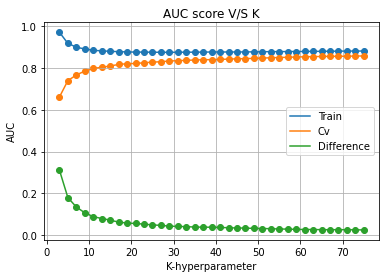

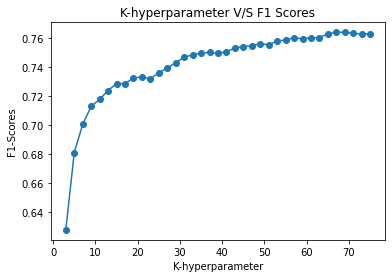

Using the best_k = 69
TEST roc_auc_score =  0.8657331251931397
TEST f1_score =  0.7811552642359689
TEST accuracy_score =  0.7774166666666666



AxesSubplot(0.125,0.125;0.62x0.755)


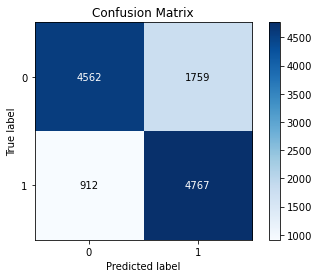

In [30]:
k = KNN_find_k (train_data = bow_train , train_target = y_train , cv_data = bow_cv , cv_target = y_cv , upper_bound = 76 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

cv = TfidfVectorizer(ngram_range = (1,2), max_features = 5000)

bow_train = cv.fit(X_Train.CleanedText)
bow_train = cv.transform(X_Train.CleanedText)
bow_test = cv.transform(X_Test.CleanedText)

bow_train = Normalizer().fit_transform(bow_train)
bow_test = Normalizer().fit_transform(bow_test)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(bow_train , Y_Train)
y_pred_proba = KNN.predict_proba(bow_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

In [35]:
del tfidf_train , tfidf_cv , bow_train , bow_test;

NameError: name 'tfidf_train' is not defined

In [32]:
# Please write all the code with proper documentation

### [3] Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

#### <font color = 'green'>Function to convert review text into Vectors using AVG-W2V

In [33]:
def convert_into_avg_w2v(w2v_new , x , vocabulary):
    avg_w2v = []
    
    for review in tqdm(x.Unstemmed_CleanedText):# preprocessed_reviews = 36k
        vec = np.zeros(150) # as we created 150 dimensional w2v
        count = 0
        for word in review.split():
            if word in vocabulary:
                vec += w2v_new[word]
                count += 1
        if count > 0:
            vec /= count
        
        avg_w2v.append(vec)
        
    avg_w2v = Normalizer().fit_transform(avg_w2v)
    
    return avg_w2v

#### <u> <font color = 'darkorange'>Using AVG-W2V

In [36]:
w2v_model = KeyedVectors.load_word2vec_format("w2v_own_model.bin" , binary = True)
vocabulary = w2v_model.key_to_index

avg_w2v_train = convert_into_avg_w2v(w2v_model ,x_train , vocabulary)

avg_w2v_cv = convert_into_avg_w2v(w2v_model ,x_cv , vocabulary)

print ("Shape of train :: " , avg_w2v_train.shape)
print ("Shape of CV :: " , avg_w2v_cv.shape)

100%|████████████████████████████████████████████████████████████████████████████| 9600/9600 [00:07<00:00, 1359.41it/s]

Shape of train ::  (38400, 150)
Shape of CV ::  (9600, 150)


k = 3 -------> auc_train =  0.9488480384426855 -------> auc_cv =  0.8177925986842896 ------> f1_score =  0.7415420023014961
k = 5 -------> auc_train =  0.9342428618986867 -------> auc_cv =  0.8454281504061354 ------> f1_score =  0.7531623534872925
k = 7 -------> auc_train =  0.9263170562256782 -------> auc_cv =  0.8590278437248975 ------> f1_score =  0.7658929196314008
k = 9 -------> auc_train =  0.9223484504249817 -------> auc_cv =  0.8660552780520182 ------> f1_score =  0.7708578143360753
k = 11 -------> auc_train =  0.9188239520117841 -------> auc_cv =  0.8712870739775402 ------> f1_score =  0.7691219799646435
k = 13 -------> auc_train =  0.9167639509021268 -------> auc_cv =  0.8747059693193775 ------> f1_score =  0.7724219210371244
k = 15 -------> auc_train =  0.9151596586618335 -------> auc_cv =  0.8777852803931198 ------> f1_score =  0.7725342142520057
k = 17 -------> auc_train =  0.9136563697945008 -------> auc_cv =  0.8795298751778169 ------> f1_score =  0.7725383062121393
k = 

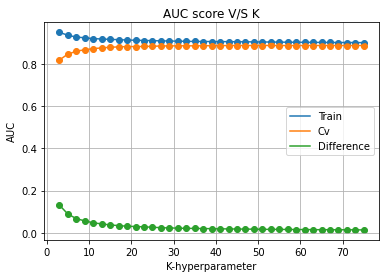

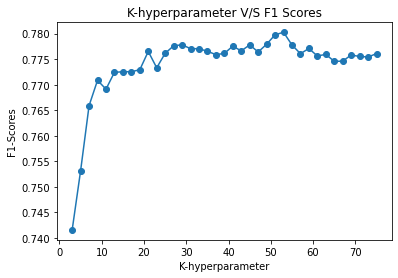

100%|██████████████████████████████████████████████████████████████████████████| 12000/12000 [00:10<00:00, 1199.57it/s]


Using the best_k = 53
TEST roc_auc_score =  0.8903337048689836
TEST f1_score =  0.7862389586238958
TEST accuracy_score =  0.8084166666666667



AxesSubplot(0.125,0.125;0.62x0.755)


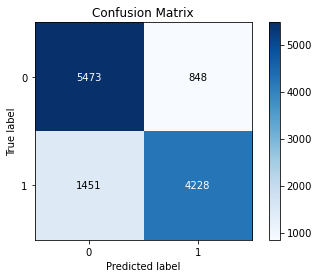

In [37]:
k = KNN_find_k (train_data = avg_w2v_train , train_target = y_train , cv_data = avg_w2v_cv , cv_target = y_cv , upper_bound = 76 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

avg_w2v_train = convert_into_avg_w2v(w2v_model , X_Train , vocabulary)
avg_w2v_test = convert_into_avg_w2v(w2v_model , X_Test , vocabulary)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(avg_w2v_train , Y_Train)
y_pred_proba = KNN.predict_proba(avg_w2v_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

In [38]:
# Please write all the code with proper documentation

del avg_w2v_train , avg_w2v_test , avg_w2v_cv;

### [4] Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

#### <font color = 'green'>Function to convert review text into Vectors using TF-IDF weighted W2V

In [39]:
def convert_into_tfidf_avg_w2v(w2v_new , x , vocabulary, tfidf , tfidf_feats):
    
    tfidf_w2v = []
    
    row = 0
    for review in tqdm(x.Unstemmed_CleanedText):
        review_vec = np.zeros(150)
        weighted_sum = 0

        for word in review.split():
            if word in vocabulary and word in tfidf_feats:

                vec = w2v_new[word]
                tfidf_val = tfidf[row , np.where(tfidf_feats == word)[0][0]]

                review_vec += (vec * tfidf_val)
                weighted_sum += tfidf_val

        if weighted_sum > 0:
            review_vec /= weighted_sum

        tfidf_w2v.append(review_vec)
        row += 1
        
    return Normalizer().fit_transform(tfidf_w2v)



#### <u><font color = 'DarkOrange'> UNI-GRAM

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

w2v_model = KeyedVectors.load_word2vec_format("w2v_own_model.bin" , binary = True)
vocabulary = w2v_model.key_to_index

cv = TfidfVectorizer(min_df = 10 , max_features = 5000)

tfidf_train = cv.fit(x_train.Unstemmed_CleanedText)
tfidf_train = cv.transform(x_train.Unstemmed_CleanedText)
tfidf_cv = cv.transform(x_cv.Unstemmed_CleanedText)

tfidf_train = Normalizer().fit_transform(tfidf_train)
tfidf_cv = Normalizer().fit_transform(tfidf_cv)

tfidf_feats = cv.get_feature_names_out()

tfidf_avg_w2v_train = convert_into_tfidf_avg_w2v(w2v_model , x_train , vocabulary, tfidf_train , tfidf_feats)
tfidf_avg_w2v_cv = convert_into_tfidf_avg_w2v(w2v_model , x_cv , vocabulary, tfidf_cv , tfidf_feats)

print ("Shape of tfidf_avg_w2v_train :: " , tfidf_avg_w2v_train.shape)
print ("Shape of tfidf_avg_w2v_cv :: " , tfidf_avg_w2v_cv.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 9600/9600 [01:26<00:00, 110.47it/s]

Shape of tfidf_avg_w2v_train ::  (38400, 150)
Shape of tfidf_avg_w2v_cv ::  (9600, 150)


k = 3 -------> auc_train =  0.9397730152079444 -------> auc_cv =  0.7888026211946121 ------> f1_score =  0.7058143567217663
k = 5 -------> auc_train =  0.9208941667167954 -------> auc_cv =  0.8160695488509047 ------> f1_score =  0.7230111996305277
k = 7 -------> auc_train =  0.9115619797903951 -------> auc_cv =  0.8271005639227125 ------> f1_score =  0.7289568137084635
k = 9 -------> auc_train =  0.9051114974789191 -------> auc_cv =  0.8347976179587177 ------> f1_score =  0.7351888208800093
k = 11 -------> auc_train =  0.9006011800175067 -------> auc_cv =  0.8425487091799104 ------> f1_score =  0.7395700174317257
k = 13 -------> auc_train =  0.8976986625369539 -------> auc_cv =  0.8451467986890007 ------> f1_score =  0.7398629022888347
k = 15 -------> auc_train =  0.8953800405906015 -------> auc_cv =  0.8492222250725459 ------> f1_score =  0.7443643969323728
k = 17 -------> auc_train =  0.8928803605649849 -------> auc_cv =  0.8510195896923535 ------> f1_score =  0.7453300846966006
k = 

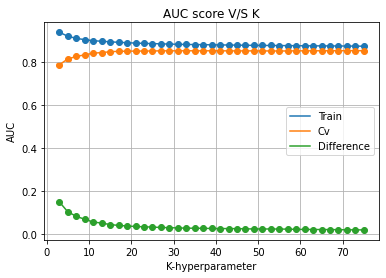

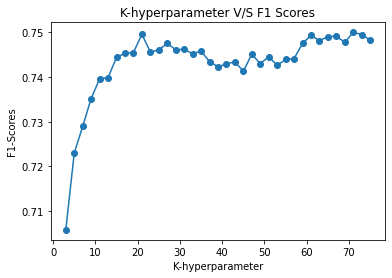

100%|███████████████████████████████████████████████████████████████████████████| 12000/12000 [01:45<00:00, 113.63it/s]


Using the best_k = 71
TEST roc_auc_score =  0.8639921420641787
TEST f1_score =  0.7614795918367347
TEST accuracy_score =  0.7818333333333334



AxesSubplot(0.125,0.125;0.62x0.755)


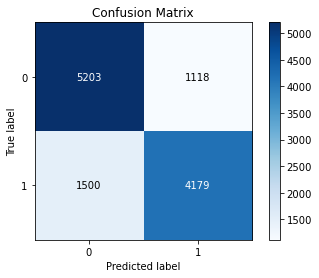

In [43]:
k = KNN_find_k (train_data = tfidf_avg_w2v_train , train_target = y_train , cv_data = tfidf_avg_w2v_cv , cv_target = y_cv , upper_bound = 76 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

cv = TfidfVectorizer(min_df = 10 , max_features = 5000)

tfidf_train = cv.fit(X_Train.Unstemmed_CleanedText)
tfidf_train = cv.transform(X_Train.Unstemmed_CleanedText)
tfidf_test = cv.transform(X_Test.Unstemmed_CleanedText)

tfidf_train = Normalizer().fit_transform(tfidf_train)
tfidf_test = Normalizer().fit_transform(tfidf_test)

tfidf_feats = cv.get_feature_names_out()

tfidf_avg_w2v_train = convert_into_tfidf_avg_w2v(w2v_model , X_Train , vocabulary , tfidf_train , tfidf_feats)
tfidf_avg_w2v_test = convert_into_tfidf_avg_w2v(w2v_model , X_Test , vocabulary , tfidf_test , tfidf_feats)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(tfidf_avg_w2v_train , Y_Train)
y_pred_proba = KNN.predict_proba(tfidf_avg_w2v_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

#### <u><font color = 'DarkOrange'> UNI+BI-GRAM

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

w2v_model = KeyedVectors.load_word2vec_format("w2v_own_model.bin" , binary = True)
vocabulary = w2v_model.key_to_index

cv = TfidfVectorizer(ngram_range = (1,2) , max_features = 5000)

tfidf_train = cv.fit(x_train.Unstemmed_CleanedText)
tfidf_train = cv.transform(x_train.Unstemmed_CleanedText)
tfidf_cv = cv.transform(x_cv.Unstemmed_CleanedText)

tfidf_train = Normalizer().fit_transform(tfidf_train)
tfidf_cv = Normalizer().fit_transform(tfidf_cv)

tfidf_feats = cv.get_feature_names_out()

tfidf_avg_w2v_train = convert_into_tfidf_avg_w2v(w2v_model , x_train , vocabulary, tfidf_train , tfidf_feats)
tfidf_avg_w2v_cv = convert_into_tfidf_avg_w2v(w2v_model , x_cv , vocabulary, tfidf_cv , tfidf_feats)

print ("Shape of tfidf_avg_w2v_train :: " , tfidf_avg_w2v_train.shape)
print ("Shape of tfidf_avg_w2v_cv :: " , tfidf_avg_w2v_cv.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 9600/9600 [01:32<00:00, 103.32it/s]

Shape of tfidf_avg_w2v_train ::  (38400, 150)
Shape of tfidf_avg_w2v_cv ::  (9600, 150)


k = 3 -------> auc_train =  0.9393717503289183 -------> auc_cv =  0.7897310206787393 ------> f1_score =  0.7066173068024063
k = 5 -------> auc_train =  0.920388075665856 -------> auc_cv =  0.816784050233212 ------> f1_score =  0.7212810396843815
k = 7 -------> auc_train =  0.9110206334344456 -------> auc_cv =  0.8259504437276682 ------> f1_score =  0.7272727272727273
k = 9 -------> auc_train =  0.9054030799412527 -------> auc_cv =  0.8349043594264254 ------> f1_score =  0.7353928034247368
k = 11 -------> auc_train =  0.900149708140232 -------> auc_cv =  0.8402770715700121 ------> f1_score =  0.7393276724438756
k = 13 -------> auc_train =  0.8968104667741 -------> auc_cv =  0.8448958196719915 ------> f1_score =  0.7405342624854819
k = 15 -------> auc_train =  0.8945257842207918 -------> auc_cv =  0.8480796215745111 ------> f1_score =  0.7451939881160433
k = 17 -------> auc_train =  0.892352685298575 -------> auc_cv =  0.8502793698438245 ------> f1_score =  0.745817843866171
k = 19 -----

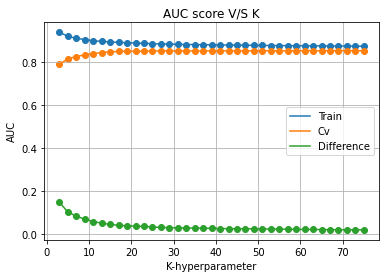

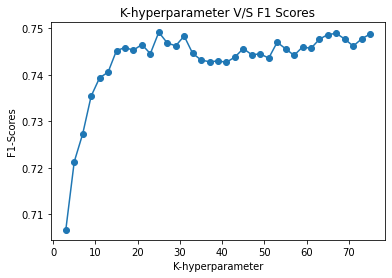

100%|███████████████████████████████████████████████████████████████████████████| 12000/12000 [01:47<00:00, 112.11it/s]


Using the best_k = 25
TEST roc_auc_score =  0.861819701774738
TEST f1_score =  0.7612620828013861
TEST accuracy_score =  0.7818333333333334



AxesSubplot(0.125,0.125;0.62x0.755)


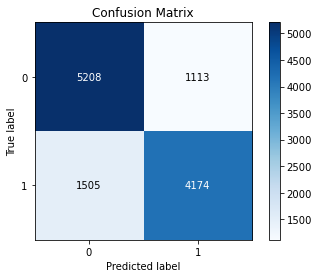

In [46]:
k = KNN_find_k (train_data = tfidf_avg_w2v_train , train_target = y_train , cv_data = tfidf_avg_w2v_cv , cv_target = y_cv , upper_bound = 76 , algo = "brute" , metr = "euclidean" 
                , plot_stuff = True)

cv = TfidfVectorizer(ngram_range = (1,2) , max_features = 5000)

tfidf_train = cv.fit(X_Train.Unstemmed_CleanedText)
tfidf_train = cv.transform(X_Train.Unstemmed_CleanedText)
tfidf_test = cv.transform(X_Test.Unstemmed_CleanedText)

tfidf_train = Normalizer().fit_transform(tfidf_train)
tfidf_test = Normalizer().fit_transform(tfidf_test)

tfidf_feats = cv.get_feature_names_out()

tfidf_avg_w2v_train = convert_into_tfidf_avg_w2v(w2v_model , X_Train , vocabulary , tfidf_train , tfidf_feats)
tfidf_avg_w2v_test = convert_into_tfidf_avg_w2v(w2v_model , X_Test , vocabulary , tfidf_test , tfidf_feats)

KNN = KNeighborsClassifier(n_neighbors = k , algorithm = 'brute')
model = KNN.fit(tfidf_avg_w2v_train , Y_Train)
y_pred_proba = KNN.predict_proba(tfidf_avg_w2v_test)[: , 1]

y_pred = []

for i in y_pred_proba:
    if (i > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Using the best_k =" , k)
print("TEST roc_auc_score = " , roc_auc_score(Y_Test, y_pred_proba))
print("TEST f1_score = " , f1_score(Y_Test, y_pred))
print("TEST accuracy_score = " , accuracy_score(Y_Test, y_pred))

print("\n\n")
print(skplt.plot_confusion_matrix(Y_Test , y_pred))

In [ ]:
# Please write all the code with proper documentation

## [6] Conclusions

In [ ]:
# Please compare all your models using Prettytable library